In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Utilizador\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
police = pd.read_csv('fatal-police-shootings-data.csv')
police.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


### Dataset Exploration

In [3]:
police2=police.copy()

In [4]:
police2.shape

(7110, 17)

In [5]:
police2.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [6]:
police2.isnull().sum()

id                            0
name                        324
date                          0
manner_of_death               0
armed                       209
age                         380
gender                        5
race                       1171
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        595
body_camera                   0
longitude                   683
latitude                    683
is_geocoding_exact            0
dtype: int64

In [127]:
# drop rows with 'race' null
police2=police2[police2['race'].notna()]

In [ ]:
# lets group 'others' and 'native american' in the same column
police2['race'].replace({'N':'O'},inplace=True)

In [145]:
#police2.groupby('race').agg({'id':'count'})
#plt.bar(x=police2['race'].value_counts().index, height=police2['race'].value_counts().values)
#plt.show()

In [157]:
police2_new=police2.groupby('race').apply(lambda x : x['id'].count()/len(police2)*100).reset_index().round(1)
police2_new

,race,0
0,A,1.8
1,B,26.8
2,H,18.3
3,O,2.3
4,W,50.8


In [158]:
police2_new.rename(columns={'race':'Race',0:'Quantity'},inplace=True)

In [163]:
police2_new.sort_values(by='Quantity',ascending=False,inplace=True)

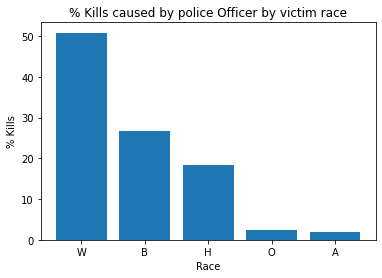

In [165]:
plt.bar(police2_new['Race'],police2_new['Quantity'])
plt.xlabel('Race')
plt.ylabel('% Kills')
plt.title('% Kills caused by police Officer by victim race')
plt.show()

### Now lets normalize the data using the percentage of population of usa by race

In [254]:
police2_new['Percentage_race_total']=[57.8,18.7,12.1,5.9,5.0]
police2_new

,Race,Quantity,Percentage_race_total
4,W,50.8,57.8
1,B,26.8,18.7
2,H,18.3,12.1
3,O,2.3,5.9
0,A,1.8,5.0


In [257]:
police2_new.rename(columns={'Quantity':'%_race_knowing_was_killed','Percentage_race_total':'%_race_total'}, inplace=True)
police2_new

,Race,% race knowing was killed,%_race_total
4,W,50.8,57.8
1,B,26.8,18.7
2,H,18.3,12.1
3,O,2.3,5.9
0,A,1.8,5.0


In [258]:
police2_new['%_killed_knowing_race']=police2_new['% race knowing was killed']/police2_new['%_race_total']

In [259]:
police2_new['%_killed_knowing_race_norm']=police2_new['%_killed_knowing_race']/police2_new['%_killed_knowing_race'].sum()
police2_new

,Race,% race knowing was killed,%_race_total,%_killed_knowing_race,%_killed_knowing_race_norm
4,W,50.8,57.8,0.878893,0.192138
1,B,26.8,18.7,1.433155,0.313308
2,H,18.3,12.1,1.512397,0.330631
3,O,2.3,5.9,0.389831,0.085222
0,A,1.8,5.0,0.360000,0.078701


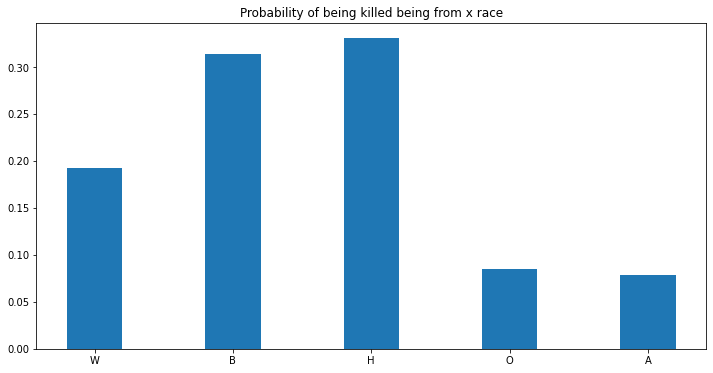

In [261]:
plt.figure(figsize=(12,6))
plt.bar(police2_new['Race'], police2_new['%_killed_knowing_race_norm'],width=0.4)
#plt.legend(ncol=2)
plt.title('Probability of being killed being from x race')
plt.show()

### Race_Poverty dataset -> Compare Poverty_race with kills_race

In [265]:
race = pd.read_excel('poverty_race_2.xlsx')

In [266]:
race.head(2)

,Year,Total,White alone (22),"White alone, not Hispanic (22)",Black alone or in combination,Black alone (24),Asian alone or in combination,Asian alone (25),Hispanic (any race) (26)
0,2020,37247.0,25007,15942,9219,8472,1808,1629,10409
1,2019,33984.0,22512,14152,8836,8073,1588,1464,9545


In [267]:
# until 2002 we have all values. Before 2002 there are missing values so i'll filter that dataset
# to have only values until 2002
race=race[:21]

In [268]:
# Keep only columns that are 'race' alone
race = race.drop(columns=['White alone (22)', 'Black alone or in combination','Asian alone or in combination'])
race=race.astype({'Total':'int32','White alone, not Hispanic (22)':'int32','Black alone (24)':'int32','Asian alone (25)':'int32','Hispanic (any race) (26)':'int32'})

In [269]:
race.dtypes

Year                              object
Total                              int32
White alone, not Hispanic (22)     int32
Black alone (24)                   int32
Asian alone (25)                   int32
Hispanic (any race) (26)           int32
dtype: object

In [271]:
race['Total_2']=race.loc[:,'White alone, not Hispanic (22)':'Hispanic (any race) (26)'].sum(axis=1)
race['Other']=race['Total']-race['Total_2']
race.head()

,Year,Total,"White alone, not Hispanic (22)",Black alone (24),Asian alone (25),Hispanic (any race) (26),Total_2,Other
0,2020,37247,15942,8472,1629,10409,36452,795
1,2019,33984,14152,8073,1464,9545,33234,750
2,2018,38146,15725,8884,1996,10526,37131,1015
3,2017 (1),39564,16619,9224,1891,10816,38550,1014
4,2017,39698,16993,8993,1953,10790,38729,969


In [272]:
race.drop(columns=['Total_2'], inplace=True)
race.rename(columns={'White alone, not Hispanic (22)':'W','Black alone (24)':'B','Asian alone (25)':'A','Hispanic (any race) (26)':'H','Other':'O'},inplace=True)

In [273]:
race.head(2)

,Year,Total,W,B,A,H,O
0,2020,37247,15942,8472,1629,10409,795
1,2019,33984,14152,8073,1464,9545,750


In [274]:
columns = ['Year', 'Total']
race = pd.melt(race,columns, var_name='Race', value_name='Quantity')
race.head()

,Year,Total,Race,Quantity
0,2020,37247,W,15942
1,2019,33984,W,14152
2,2018,38146,W,15725
3,2017 (1),39564,W,16619
4,2017,39698,W,16993


In [277]:
race.isnull().sum()

Year        0
Total       0
Race        0
Quantity    0
dtype: int64

In [278]:
# need to change the 'quantity' type to int
race.dtypes

Year        object
Total        int32
Race        object
Quantity     int64
dtype: object

In [96]:
#vertical.astype({'Quantity':'int32'}).dtypes

In [279]:
race=(race.groupby('Race').agg({'Quantity':'mean'}).reset_index().round(0))
race

,Race,Quantity
0,A,1718.0
1,B,9554.0
2,H,11119.0
3,O,904.0
4,W,17240.0


In [280]:
race['%_race_knowing_poor']=(race['Quantity']/race['Quantity'].sum()*100).round(1)
race

,Race,Quantity,%_race_knowing_poor
0,A,1718.0,4.2
1,B,9554.0,23.6
2,H,11119.0,27.4
3,O,904.0,2.2
4,W,17240.0,42.5


In [285]:
race.sort_values(by='Quantity', ascending=False, inplace=True)

In [286]:
# P(race and poor)=P(race|poor)*P(poor) --> P(poor)=Nº poor/Total Population
race['%_race_and_poor']=((race['%_race_knowing_poor']/100)*((race['Quantity'].sum())/332523600))#.round()
race

,Race,Quantity,%_race_knowing_poor,%_race_and_poor
4,W,17240.0,42.5,0.000052
2,H,11119.0,27.4,0.000033
1,B,9554.0,23.6,0.000029
0,A,1718.0,4.2,0.000005
3,O,904.0,2.2,0.000003


In [ ]:
# We'll consider that all the people killed by the police are poor or rich in the same proportion for
# all races. So we'll consider that P(race and poor | killed) = P(race|killed)

In [289]:
race=race.merge(police2_new, how='outer', left_on='Race', right_on='Race')

In [290]:
race

,Race,Quantity,%_race_knowing_poor,%_race_and_poor,% race knowing was killed,%_race_total,%_killed_knowing_race,%_killed_knowing_race_norm
0,W,17240.0,42.5,0.000052,50.8,57.8,0.878893,0.192138
1,H,11119.0,27.4,0.000033,18.3,12.1,1.512397,0.330631
2,B,9554.0,23.6,0.000029,26.8,18.7,1.433155,0.313308
3,A,1718.0,4.2,0.000005,1.8,5.0,0.360000,0.078701
4,O,904.0,2.2,0.000003,2.3,5.9,0.389831,0.085222


In [293]:
race['%_killed_knowing_race_and_poor']=(race['% race knowing was killed']/100)/race['%_race_and_poor']
race['%_killed_knowing_race_and_poor_norm']=race['%_killed_knowing_race_and_poor']/race['%_killed_knowing_race_and_poor'].sum()
race

,Race,Quantity,%_race_knowing_poor,%_race_and_poor,% race knowing was killed,%_race_total,%_killed_knowing_race,%_killed_knowing_race_norm,%_killed_knowing_race_and_poor,%_killed_knowing_race_and_poor_norm
0,W,17240.0,42.5,0.000052,50.8,57.8,0.878893,0.192138,9805.439819,0.267236
1,H,11119.0,27.4,0.000033,18.3,12.1,1.512397,0.330631,5478.893054,0.149321
2,B,9554.0,23.6,0.000029,26.8,18.7,1.433155,0.313308,9315.691273,0.253889
3,A,1718.0,4.2,0.000005,1.8,5.0,0.360000,0.078701,3515.729969,0.095817
4,O,904.0,2.2,0.000003,2.3,5.9,0.389831,0.085222,8576.250378,0.233736


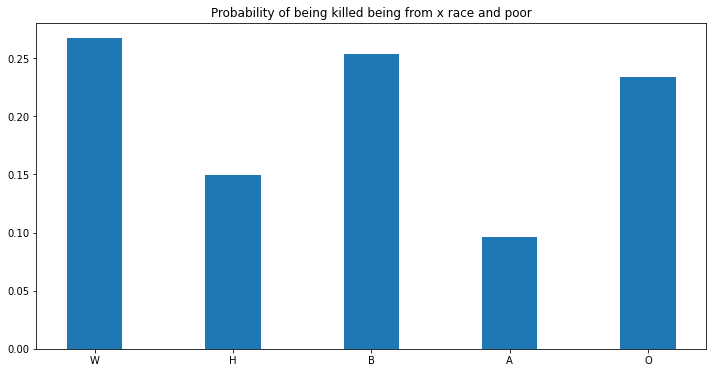

In [294]:
plt.figure(figsize=(12,6))
plt.bar(race['Race'], race['%_killed_knowing_race_and_poor_norm'],width=0.4)
#plt.legend(ncol=2)
plt.title('Probability of being killed being from x race and poor')
plt.show()

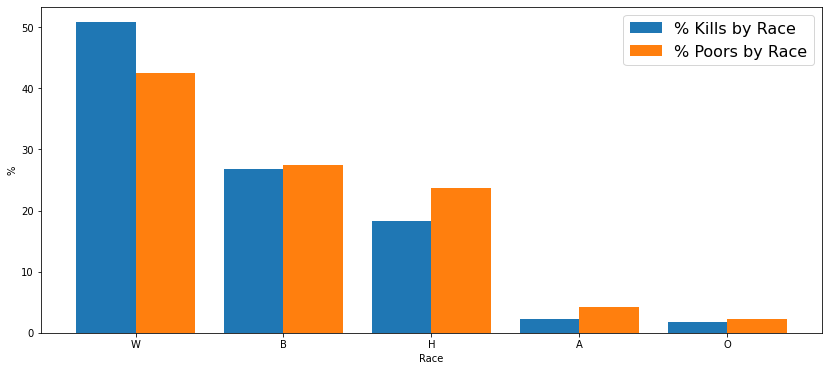

In [200]:
X=['W','B','H','A','O']
X_axis = np.arange(len(X))

plt.figure(figsize=(14,6))
plt.bar(X_axis - 0.2,police2_new['Quantity'],width=0.4, label='% Kills by Race')
plt.bar(X_axis + 0.2, height=new_vertical['Percentage'],width=0.4, label='% Poors by Race')

plt.xticks(X_axis, X)
plt.xlabel("Race")
plt.ylabel("%")
plt.legend(fontsize=16)
plt.show()

### Kills_race vs Population_race

In [230]:
new_vertical['Percentage_race_total']=[57.8,18.7,12.1,5.9,5.0]

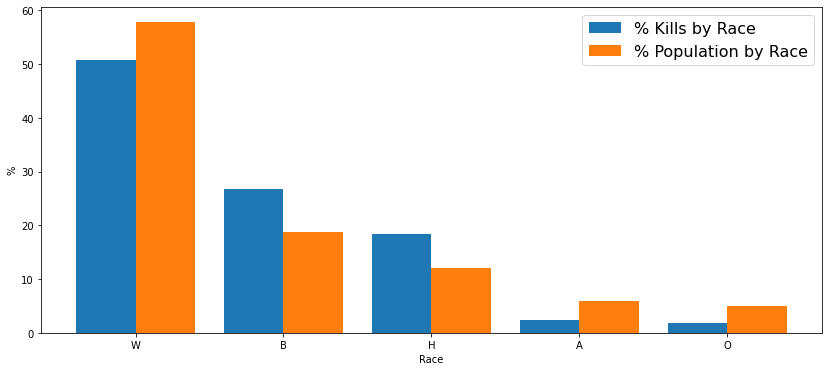

In [231]:
X=['W','B','H','A','O']
X_axis = np.arange(len(X))

plt.figure(figsize=(14,6))
plt.bar(X_axis - 0.2,police2_new['Quantity'],width=0.4, label='% Kills by Race')
plt.bar(X_axis + 0.2, height=new_vertical['Percentage_race_total'],width=0.4, label='% Population by Race')

plt.xticks(X_axis, X)
plt.xlabel("Race")
plt.ylabel("%")
plt.legend(fontsize=16)
plt.show()

### Build charts comparing kills with different features

In [295]:
police3=police.copy()
police3.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [296]:
police3.isnull().sum()

id                            0
name                        324
date                          0
manner_of_death               0
armed                       209
age                         380
gender                        5
race                       1171
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        595
body_camera                   0
longitude                   683
latitude                    683
is_geocoding_exact            0
dtype: int64

In [297]:
police3=police3[police3['race'].notna()]

In [298]:
police3.isnull().sum()

id                           0
name                        45
date                         0
manner_of_death              0
armed                      199
age                        114
gender                       1
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       380
body_camera                  0
longitude                  331
latitude                   331
is_geocoding_exact           0
dtype: int64

In [299]:
police3=police3[police3['armed'].notna()]

In [304]:
police3['armed'].value_counts()

gun                  3397
knife                 872
unarmed               415
toy weapon            209
vehicle               185
                     ... 
fireworks               1
pen                     1
chainsaw                1
gun and sword           1
knife and vehicle       1
Name: armed, Length: 98, dtype: int64

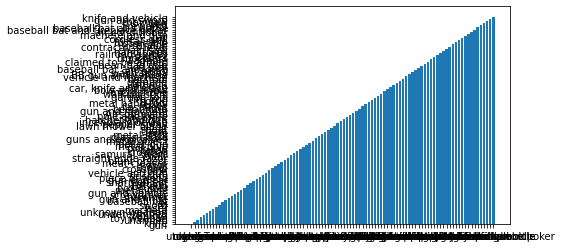

In [303]:
plt.bar(police3['armed'].value_counts().index, police3['armed'].value_counts().index)
plt.show()

### Race_Poverty dataset -> Check dependence between race and poverty

In [228]:
new_vertical['Percentage_race_total']=[57.8,18.7,12.1,5.9,5.0]

In [229]:
new_vertical

,Race,Quantity,Percentage,Percentage_race_total
4,W,17240.0,0.425,57.8
2,H,11119.0,0.274,18.7
1,B,9554.0,0.236,12.1
0,A,1718.0,0.042,5.9
3,O,904.0,0.022,5.0


In [216]:
new_vertical['Percentage']=new_vertical['Percentage']/100

In [217]:
new_vertical['final_value']=new_vertical['Percentage']*new_vertical['Percentage_race_total']
new_vertical

,Race,Quantity,Percentage,Percentage_race_total,final_value
4,W,17240.0,0.425,0.578,0.245650
2,H,11119.0,0.274,0.187,0.051238
1,B,9554.0,0.236,0.121,0.028556
0,A,1718.0,0.042,0.059,0.002478
3,O,904.0,0.022,0.050,0.001100


In [232]:
new_vertical['P_killed_being_race']=new_vertical['Percentage']/new_vertical['Percentage_race_total']
new_vertical

,Race,Quantity,Percentage,Percentage_race_total,P_killed_being_race
4,W,17240.0,0.425,57.8,0.007353
2,H,11119.0,0.274,18.7,0.014652
1,B,9554.0,0.236,12.1,0.019504
0,A,1718.0,0.042,5.9,0.007119
3,O,904.0,0.022,5.0,0.004400


In [235]:
1/(new_vertical['P_killed_being_race'].sum())

18.857917772498645

In [236]:
# Probability of being killed knowing you're from a specific race
new_vertical['P_killed_being_race_norm']=new_vertical['P_killed_being_race']/(new_vertical['P_killed_being_race'].sum())
new_vertical

,Race,Quantity,Percentage,Percentage_race_total,P_killed_being_race,P_killed_being_race_norm
4,W,17240.0,0.425,57.8,0.007353,0.138661
2,H,11119.0,0.274,18.7,0.014652,0.276314
1,B,9554.0,0.236,12.1,0.019504,0.367807
0,A,1718.0,0.042,5.9,0.007119,0.134243
3,O,904.0,0.022,5.0,0.004400,0.082975


In [237]:
new_vertical['P_killed_being_race_norm'].sum()

1.0

In [210]:
us_race_perce_dict={'W':0.578, 'B':0.121, 'H':0.187,'A':0.059,'O':0.05}
us_race_perce_dict

{'W': 0.578, 'B': 0.121, 'H': 0.187, 'A': 0.059, 'O': 0.05}

In [213]:
us_race_perce = pd.DataFrame.from_dict(data=us_race_perce_dict, orient='index')
us_race_perce

,0
W,0.578
B,0.121
H,0.187
A,0.059
O,0.050


In [225]:
pd.read_csv('poverty_total.csv', sep=',')

,"Location,""White"",""Black"",""Hispanic"",""Asian/Native Hawaiian and Pacific Islander"",""American Indian/Alaska Native"",""Multiple Races"",""Total"",Footnotes"
0,"United States,""0.090"",""0.212"",""0.172"",""0.097"",..."
1,"Alabama,""0.115"",""0.236"",""0.244"",""0.107"",""0.156..."
2,"Alaska,""0.069"",""N/A"",""0.149"",""N/A"",""0.240"",""0...."
3,"Arizona,""0.092"",""0.175"",""0.182"",""0.115"",""0.290..."
4,"Arkansas,""0.134"",""0.289"",""0.201"",""0.125"",""0.15..."
5,"California,""0.084"",""0.193"",""0.150"",""0.090"",""0...."
6,"Colorado,""0.070"",""0.197"",""0.143"",""0.082"",""0.18..."
7,"Connecticut,""0.058"",""0.184"",""0.220"",""0.088"",""N..."
8,"Delaware,""0.073"",""0.173"",""0.211"",""0.084"",""N/A""..."
9,"District of Columbia,""0.051"",""0.234"",""0.089"",""..."
